# About data: 


Store mainly sells 
1) lingerie
2) shoes
3) dress/tops

In [1]:
import pandas as pd

In [5]:
df = pd.read_json('clothing_data.json',lines=True)
df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [7]:
df.columns = ['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length',
       'fit', 'user_id', 'shoe_size', 'shoe_width', 'review_summary', 'review_text']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup_size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra_size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe_size       27915 non-null  float64
 15  shoe_width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [10]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'percentage_missing': (df.isnull().sum()/82790)*100})
missing_data

,total_missing,percentage_missing
item_id,0,0.000000
waist,79908,96.518903
size,0,0.000000
quality,68,0.082136
cup_size,6255,7.555260
hips,26726,32.281677
bra_size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118


In [11]:
df.describe()

,item_id,waist,size,quality,hips,bra_size,user_id,shoe_size
count,82790.000000,2882.000000,82790.000000,82722.000000,56064.000000,76772.000000,82790.000000,27915.000000
mean,469325.229170,31.319223,12.661602,3.949058,40.358501,35.972125,498849.564718,8.145818
std,213999.803314,5.302849,8.271952,0.992783,5.827166,3.224907,286356.969459,1.336109
min,123373.000000,20.000000,0.000000,1.000000,30.000000,28.000000,6.000000,5.000000
25%,314980.000000,28.000000,8.000000,3.000000,36.000000,34.000000,252897.750000,7.000000
50%,454030.000000,30.000000,12.000000,4.000000,39.000000,36.000000,497913.500000,8.000000
75%,658440.000000,34.000000,15.000000,5.000000,43.000000,38.000000,744745.250000,9.000000
max,807722.000000,50.000000,38.000000,5.000000,60.000000,48.000000,999972.000000,38.000000


In [21]:
import matplotlib.pyplot as plt

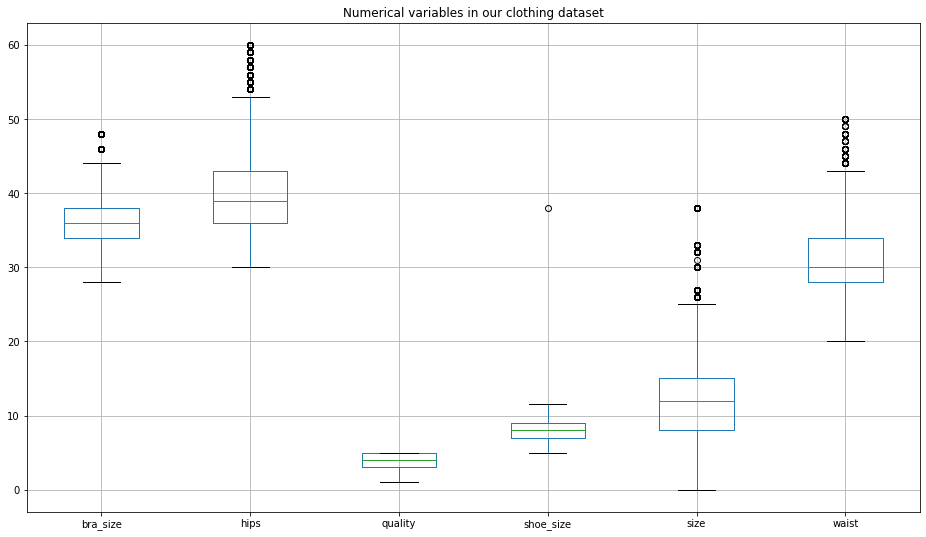

In [13]:
numerical_variables = ['bra_size','hips','quality','shoe_size','size','waist']
plt.figure(figsize=(16,9))
df[numerical_variables].boxplot()
plt.title("Numerical variables in our clothing dataset")
plt.show()

Shoe size has only one outlier that we can see and it 38 only

In [14]:
df[df.shoe_size == 38]

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
37313,416942,35.0,12,5.0,d,46.0,36.0,new,37-39,5ft 5in,Catslittle,just right,fit,237498,38.0,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


all other entries are somewhat legit , entering null into it

In [15]:
df.at[37313,'shoe_size'] = None

boxplot showing 2 outliers for bra_size

In [18]:
df.sort_values(by=['bra_size'], ascending=False).head(5)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
73118,753429,NaN,38,3.0,dd/e,NaN,48.0,bottoms,NaN,5ft 4in,Mikki,slightly long,large,93792,NaN,NaN,I probably should have or,"I probably should have ordered a size down, bu..."
80713,796383,NaN,12,4.0,k,60.0,48.0,outerwear,NaN,7ft 11in,bandnerd2522,just right,small,810539,11.5,average,"This jacket is lovely, bu","This jacket is lovely, but I couldn't move my ..."
28901,401773,NaN,38,4.0,dd/e,58.0,48.0,new,NaN,5ft 7in,barretts4jesus,just right,fit,59963,NaN,NaN,Wonderful cardigan. I hav,Wonderful cardigan. I have the honey one as we...
71407,726492,NaN,15,3.0,k,60.0,48.0,bottoms,NaN,7ft 11in,bandnerd2522,slightly short,fit,708288,11.5,average,The pattern is just as lo,"The pattern is just as lovely in person, as in..."
38125,417269,NaN,38,3.0,d,35.0,48.0,new,NaN,5ft 9in,Susan,just right,large,308819,NaN,NaN,I wish I could have gotte,I wish I could have gotten the 3x but it's sti...


# Cleaning 

In [ ]:
def plot_dist(col, ax):
    df[col][df[col].notnull()].value_counts().plot('bar', facecolor='y', ax=ax)
    return ax

f, ax = plt.subplots(3,3, figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['bra_size','bust', 'category', 'cup_size', 'fit', 'height', 'hips', 'length', 'quality']
k = 0
for i in range(3):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k += 1
     

<AxesSubplot:>

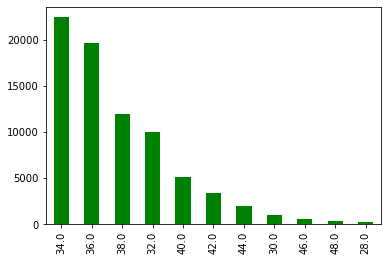

In [33]:
df['bra_size'][df['bra_size'].notnull()].value_counts().plot(kind='bar', facecolor='g')

In [34]:
df.bra_size= df.bra_size.fillna('Unknown')

In [35]:
df.bra_size = df.bra_size.astype('category').cat.as_ordered()

<AxesSubplot:>

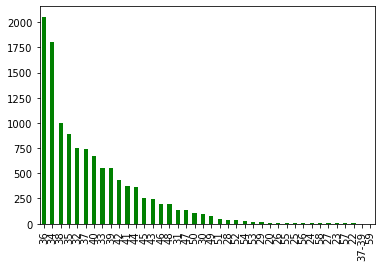

In [36]:
df['bust'][df['bust'].notnull()].value_counts().plot(kind='bar', facecolor='g')

one entry has value '37-39' should replace it with 38 

In [39]:
df[df.bust== '37-39']

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
37313,416942,35.0,12,5.0,d,46.0,36.0,new,37-39,5ft 5in,Catslittle,just right,fit,237498,NaN,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


around 86% of the data in bust is missing , thinking of removing it 

In [40]:
df.at[37313,'bust'] = 38

In [42]:
df.at[37313,'bust'] 

38

In [43]:
df.bust= df.bust.fillna(0).astype(int)

<AxesSubplot:>

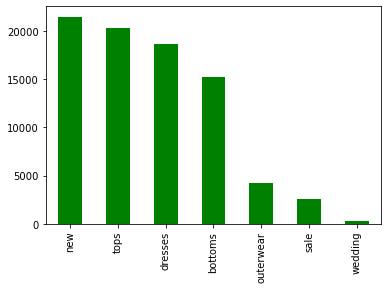

In [45]:
df['category'][df['category'].notnull()].value_counts().plot(kind='bar', facecolor='g')

In [44]:
df.category= df.category.astype('category')

<AxesSubplot:>

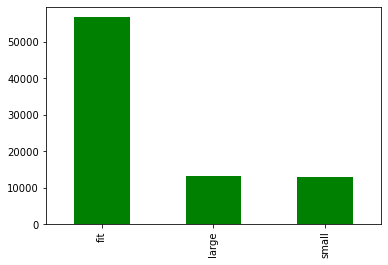

In [48]:
df['fit'][df['fit'].notnull()].value_counts().plot(kind='bar', facecolor='g')

In [46]:
df.fit = df.fit.astype('category')

<AxesSubplot:>

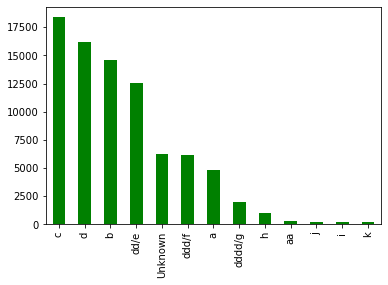

In [49]:
df['cup_size'][df['cup_size'].notnull()].value_counts().plot(kind='bar', facecolor='g')

In [47]:
df.cup_size.fillna('Unknown', inplace=True)
df.cup_size = df.cup_size.astype('category').cat.as_ordered()

<AxesSubplot:>

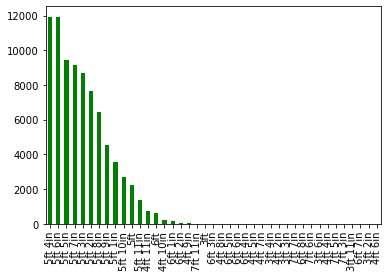

In [50]:
df['height'][df['height'].notnull()].value_counts().plot(kind='bar', facecolor='g')

height column has confusing values in feets should convert it into cms

In [51]:
def get_cms(x):
    if type(x) == type(1.0):
        return
    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)
df.height = df.height.apply(get_cms)

In [52]:
df.head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,167.64,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,0,157.48,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,0,170.18,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,Unknown,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,0,157.48,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [53]:
df[df.height.isnull()].head(20)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
3,123373,NaN,21,5.0,dd/e,NaN,Unknown,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
17,123373,NaN,15,4.0,dddd/g,NaN,36.0,new,0,NaN,Megan,just right,large,128353,NaN,NaN,NaN,NaN
43,123373,NaN,15,5.0,dd/e,NaN,36.0,new,0,NaN,sdhewey,just right,fit,670919,NaN,NaN,NaN,NaN
73,124124,NaN,20,4.0,c,NaN,38.0,new,0,NaN,Fiorella,just right,large,816504,NaN,NaN,NaN,NaN
131,124124,NaN,12,3.0,c,NaN,36.0,new,0,NaN,jmcrowder.1124,very short,fit,846091,NaN,NaN,NaN,NaN
213,124124,NaN,20,4.0,d,NaN,40.0,new,0,NaN,rhea_heather,just right,fit,121007,NaN,NaN,NaN,NaN
382,125442,NaN,5,5.0,b,NaN,34.0,new,0,NaN,kelsi.flatland,just right,large,5752,NaN,NaN,NaN,NaN
423,125442,NaN,7,5.0,c,NaN,34.0,new,0,NaN,Naomi,just right,fit,563612,NaN,NaN,NaN,NaN
456,125442,NaN,7,5.0,b,NaN,38.0,new,0,NaN,shirawzn,just right,fit,968605,NaN,NaN,NaN,NaN
475,125442,NaN,7,5.0,dd/e,36.0,30.0,new,0,NaN,Ingrid,just right,small,940714,NaN,NaN,NaN,NaN


##IMPORTANT OBSERVATION : Some customers have given bra_size, cup_size data whereas all other measurements are empty making them possible first time purchase at store for lingerie or bra

Similarly , some have given shoe Size and all other data is missing possibly they have purchased shoes from the store

# Adding new column first_time_user

from here i will identify the transactions that are first time users

##LOGIC : 1)bra_size,cup_size given rest data missing 
2)shoe_size given rest data missing
3)hips,waist given rest data missing

In [57]:
df[((df.bra_size != 'Unknown') | (df.cup_size != 'Unknown')) &
   (df.height.isnull())&(df.hips.isnull())&(df.shoe_size.isnull())&(df.shoe_width.isnull())&(df.waist.isnull())].head(5)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
3,123373,NaN,21,5.0,dd/e,NaN,Unknown,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
17,123373,NaN,15,4.0,dddd/g,NaN,36.0,new,0,NaN,Megan,just right,large,128353,NaN,NaN,NaN,NaN
43,123373,NaN,15,5.0,dd/e,NaN,36.0,new,0,NaN,sdhewey,just right,fit,670919,NaN,NaN,NaN,NaN
73,124124,NaN,20,4.0,c,NaN,38.0,new,0,NaN,Fiorella,just right,large,816504,NaN,NaN,NaN,NaN
131,124124,NaN,12,3.0,c,NaN,36.0,new,0,NaN,jmcrowder.1124,very short,fit,846091,NaN,NaN,NaN,NaN


In [58]:
df[(df.bra_size=='Unknown')&(df.cup_size =='Unknown')&(df.height.isnull())&(df.hips.isnull())&
   ((df.shoe_size.notnull()) | (df.shoe_width.notnull())) & (df.waist.isnull())].head(5)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
553,125442,NaN,7,5.0,Unknown,NaN,Unknown,new,0,NaN,sharonpeporter,slightly long,fit,461540,7.0,average,NaN,NaN
591,125442,NaN,7,3.0,Unknown,NaN,Unknown,new,0,NaN,julia.burch,slightly short,small,675878,8.5,narrow,NaN,NaN
665,125442,NaN,7,5.0,Unknown,NaN,Unknown,new,0,NaN,Kate,slightly short,fit,131784,9.5,wide,NaN,NaN
908,125442,NaN,13,2.0,Unknown,NaN,Unknown,new,0,NaN,Tallulah,slightly short,fit,198731,8.5,average,NaN,NaN
1189,126885,NaN,20,4.0,Unknown,NaN,Unknown,new,0,NaN,celinemaslard,just right,fit,295466,8.5,NaN,NaN,NaN


In [59]:
df[(df.bra_size == 'Unknown') & (df.cup_size == 'Unknown') & (df.height.isnull()) & ((df.hips.notnull()) | (df.waist.notnull())) &
     (df.shoe_size.isnull()) & (df.shoe_width.isnull())].head(3)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
2364,131020,NaN,11,5.0,Unknown,39.0,Unknown,new,0,NaN,aislinnalysse,just right,fit,259712,NaN,NaN,NaN,NaN
3568,143287,NaN,12,5.0,Unknown,41.0,Unknown,new,38,NaN,a.stahle,just right,fit,300915,NaN,NaN,NaN,NaN
8714,161514,NaN,26,5.0,Unknown,58.0,Unknown,dresses,0,NaN,foxlindseyfox,just right,fit,817544,NaN,NaN,I wore this dress when I,I wore this dress when I was in a friend's wed...


Will add new column if any of the above condition is true then will consider it new user transaction

In [73]:
lingerie_cond = (((df.bra_size != 'Unknown') | (df.cup_size != 'Unknown')) & (df.height.isnull()) & (df.hips.isnull()) &
     (df.shoe_size.isnull()) & (df.shoe_width.isnull()) & (df.waist.isnull()))
shoe_cond = ((df.bra_size == 'Unknown') & (df.cup_size == 'Unknown') & (df.height.isnull()) & (df.hips.isnull()) &
     ((df.shoe_size.notnull()) | (df.shoe_width.notnull())) & (df.waist.isnull()))
dress_cond = ((df.bra_size == 'Unknown') & (df.cup_size == 'Unknown') & (df.height.isnull()) & ((df.hips.notnull()) | (df.waist.notnull())) &
     (df.shoe_size.isnull()) & (df.shoe_width.isnull()))

df['first_time_user'] = (lingerie_cond | shoe_cond | dress_cond)
df.head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,first_time_user
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,167.64,Emily,just right,small,991571,NaN,NaN,NaN,NaN,False
1,123373,31.0,13,3.0,b,30.0,36.0,new,0,157.48,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN,False
2,123373,30.0,7,2.0,b,NaN,32.0,new,0,170.18,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN,False
3,123373,NaN,21,5.0,dd/e,NaN,Unknown,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN,True
4,123373,NaN,18,5.0,b,NaN,36.0,new,0,157.48,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN,False


Hell yeah !!!!!! :D

In [74]:
print("Total first time users: " + str(len(df[(lingerie_cond | shoe_cond | dress_cond)].user_id.unique())))

Total first time users: 565


length column has only 35 missing rows so can be deleted

In [75]:
missing_rows = df[df.length.isnull()].index
df.drop(missing_rows, axis = 0, inplace=True)

In [77]:
df.shape

(82755, 19)

same goes for quality

In [78]:
missing_rows = df[df.quality.isnull()].index
df.drop(missing_rows, axis = 0, inplace=True)
df.quality = df.quality.astype('category').cat.as_ordered()

In [79]:
df.shape

(82697, 19)

In [80]:
df.review_summary = df.review_summary.fillna('Unknown')
df.review_text = df.review_text.fillna('Unkown')

In [81]:
df.drop(['waist', 'bust', 'user_name'], axis=1, inplace=True)

In [82]:
df.head()

,item_id,size,quality,cup_size,hips,bra_size,category,height,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,first_time_user
0,123373,7,5.0,d,38.0,34.0,new,167.64,just right,small,991571,NaN,NaN,Unknown,Unkown,False
1,123373,13,3.0,b,30.0,36.0,new,157.48,just right,small,587883,NaN,NaN,Unknown,Unkown,False
2,123373,7,2.0,b,NaN,32.0,new,170.18,slightly long,small,395665,9.0,NaN,Unknown,Unkown,False
3,123373,21,5.0,dd/e,NaN,Unknown,new,NaN,just right,fit,875643,NaN,NaN,Unknown,Unkown,True
4,123373,18,5.0,b,NaN,36.0,new,157.48,slightly long,small,944840,NaN,NaN,Unknown,Unkown,False


shoe_size has around 66% misiing data , cant remove , filling NA, converting to categorical

In [84]:
from pandas.api.types import CategoricalDtype
shoe_widths_type = CategoricalDtype(categories=['Unknown','narrow','average','wide'], ordered=True)

df.shoe_size = df.shoe_size.fillna('Unknown')
df.shoe_size = df.shoe_size.astype('category').cat.as_ordered()
df.shoe_width = df.shoe_width.fillna('Unknown')
df.shoe_width = df.shoe_width.astype(shoe_widths_type)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81594 entries, 0 to 82789
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   item_id          81594 non-null  int64   
 1   size             81594 non-null  int64   
 2   quality          81594 non-null  category
 3   cup_size         81594 non-null  category
 4   hips             55783 non-null  float64 
 5   bra_size         81594 non-null  category
 6   category         81594 non-null  category
 7   height           81594 non-null  float64 
 8   length           81594 non-null  object  
 9   fit              81594 non-null  category
 10  user_id          81594 non-null  int64   
 11  shoe_size        81594 non-null  category
 12  shoe_width       81594 non-null  category
 13  review_summary   81594 non-null  object  
 14  review_text      81594 non-null  object  
 15  first_time_user  81594 non-null  bool    
dtypes: bool(1), category(7), float64(2), int

In [86]:
df.hips = df.hips.fillna(-1.0)
bins = [-5,0,31,37,40,44,75]
labels = ['Unknown','XS','S','M', 'L','XL']
df.hips = pd.cut(df.hips, bins, labels=labels)

ABOUT pd.cut() :  https://pandas.pydata.org/docs/reference/api/pandas.cut.html

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81594 entries, 0 to 82789
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   item_id          81594 non-null  int64   
 1   size             81594 non-null  int64   
 2   quality          81594 non-null  category
 3   cup_size         81594 non-null  category
 4   hips             81594 non-null  category
 5   bra_size         81594 non-null  category
 6   category         81594 non-null  category
 7   height           81594 non-null  float64 
 8   length           81594 non-null  object  
 9   fit              81594 non-null  category
 10  user_id          81594 non-null  int64   
 11  shoe_size        81594 non-null  category
 12  shoe_width       81594 non-null  category
 13  review_summary   81594 non-null  object  
 14  review_text      81594 non-null  object  
 15  first_time_user  81594 non-null  bool    
dtypes: bool(1), category(8), float64(1), int

no more null values 

# EDA via Vizualization

In [92]:
import numpy as np

In [97]:

def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -   {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)
    
def norm_counts(t):
    norms = np.linalg.norm(t.fillna(0), axis=1)
    t_norm = t[0:0]
    for row, euc in zip(t.iterrows(), norms):
        t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
    return t_norm

In [98]:
df.category.value_counts()

new          21177
tops         20048
dresses      18402
bottoms      15047
outerwear     4180
sale          2469
wedding        271
Name: category, dtype: int64

C:\Users\DVASWANI\AppData\Local\Temp\ipykernel_22564\491384212.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
C:\Users\DVASWANI\AppData\Local\Temp\ipykernel_22564\491384212.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
C:\Users\DVASWANI\AppData\Local\Temp\ipykernel_22564\491384212.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

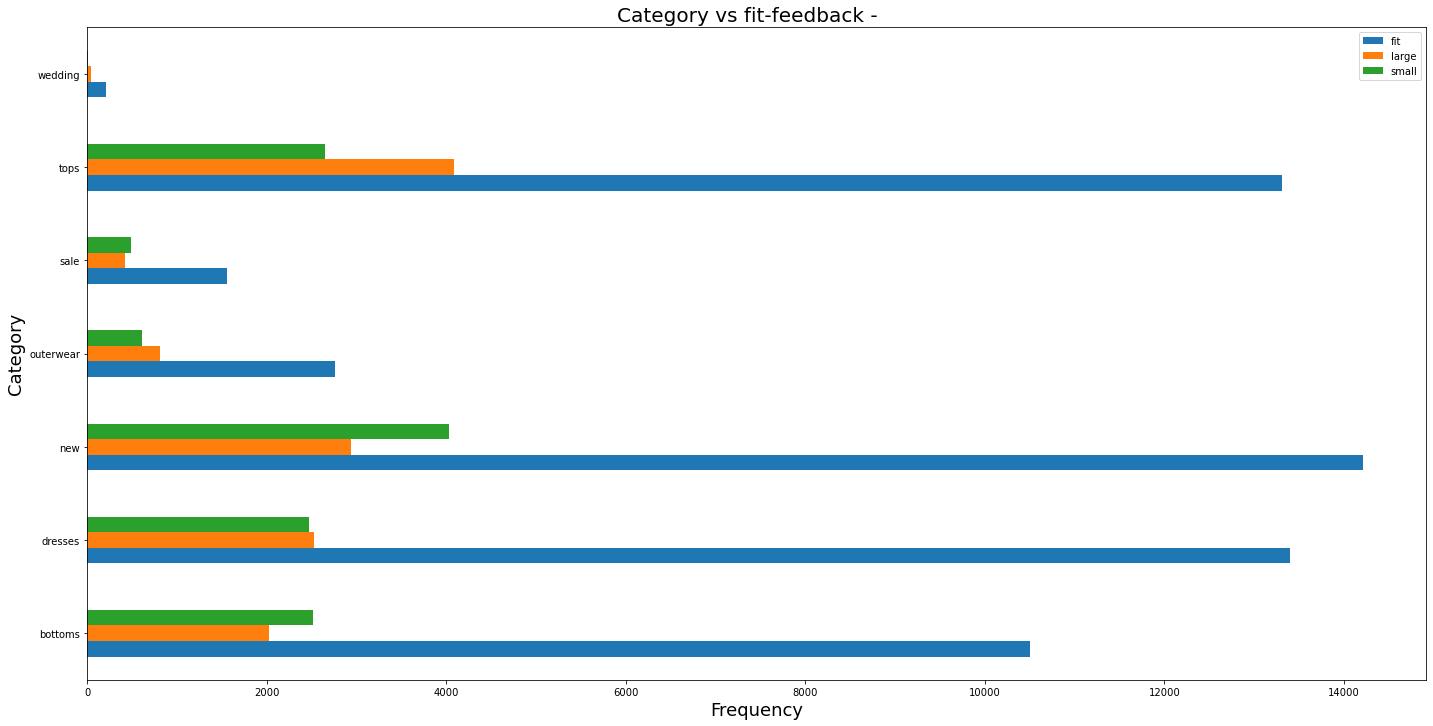

In [99]:
g_by_category = df.groupby('category')
cat_fit = g_by_category['fit'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
cat_fit_norm.drop(['fit'], axis=1, inplace=True)
plot_barh(cat_fit, 'fit')

most of the dresses were fit we can see

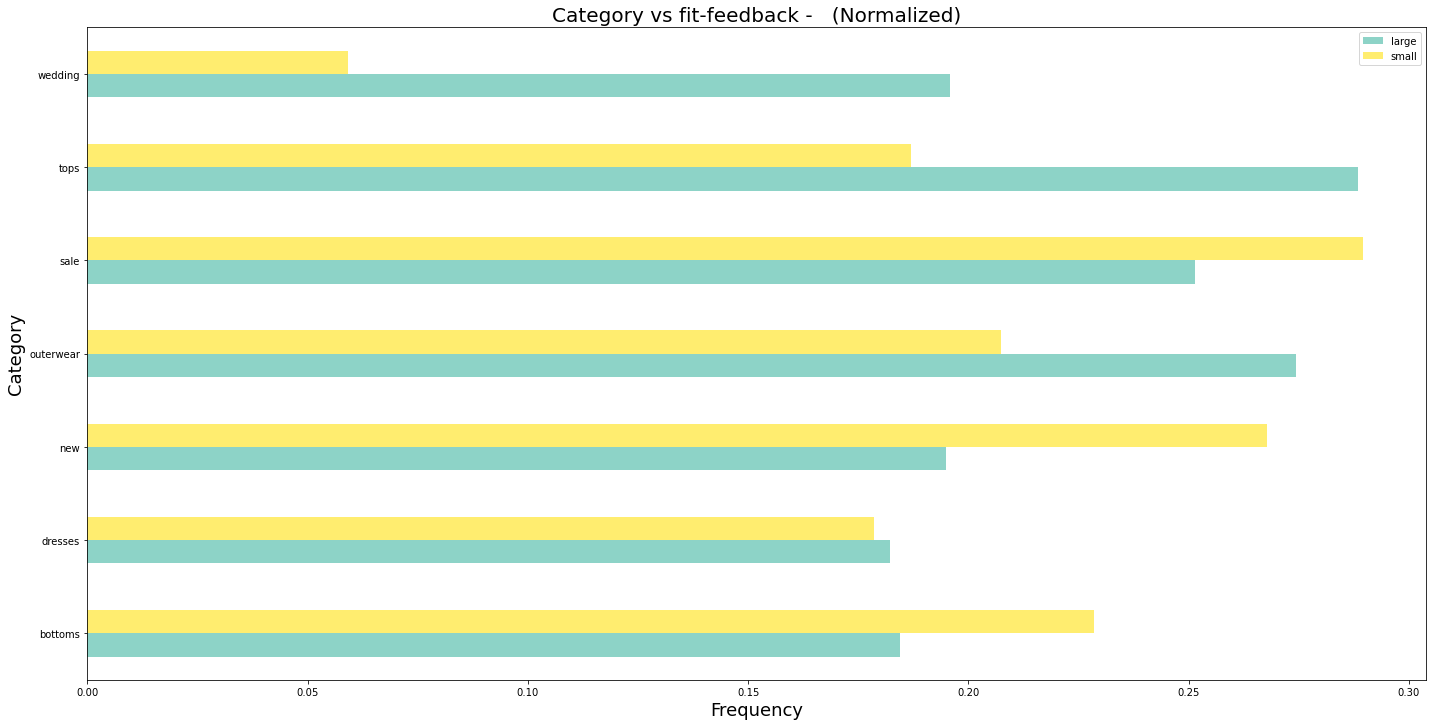

In [100]:
plot_barh(cat_fit_norm, 'fit', norm=1, cmap='Set3')

1 ) Wedding, tops, & outerwear categories usually have more returns due to large sizing.
2)  New, sale, & bottoms usually have frequent returns due to small sized buys

CATEGORY VS LENGTH

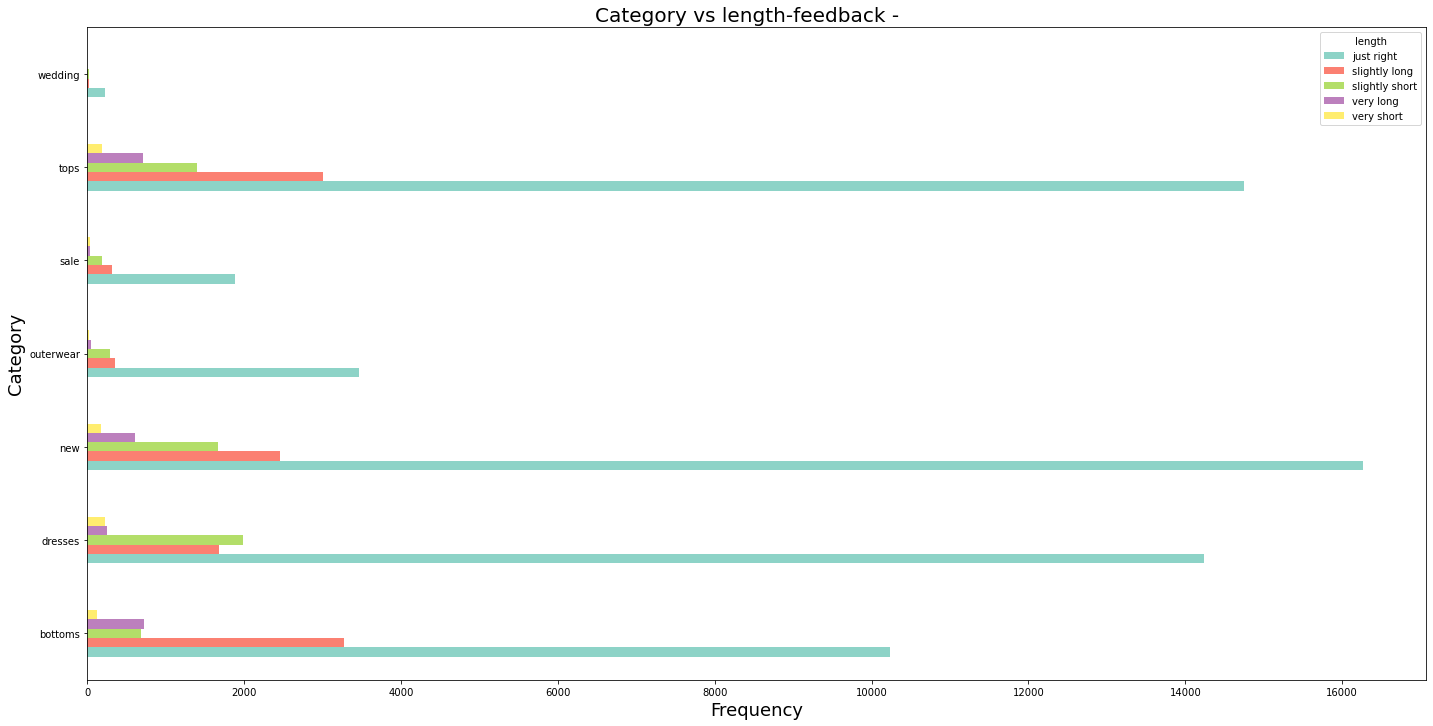

In [102]:
cat_len = g_by_category['length'].value_counts()
cat_len = cat_len.unstack()
plot_barh(cat_len, 'length', 'Set3')

Best length-fitting TRANSACTIONS belongs to tops, new, dresses and bottoms . also because of they combinely give us around 92% of all transactions

C:\Users\DVASWANI\AppData\Local\Temp\ipykernel_22564\491384212.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
C:\Users\DVASWANI\AppData\Local\Temp\ipykernel_22564\491384212.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
C:\Users\DVASWANI\AppData\Local\Temp\ipykernel_22564\491384212.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

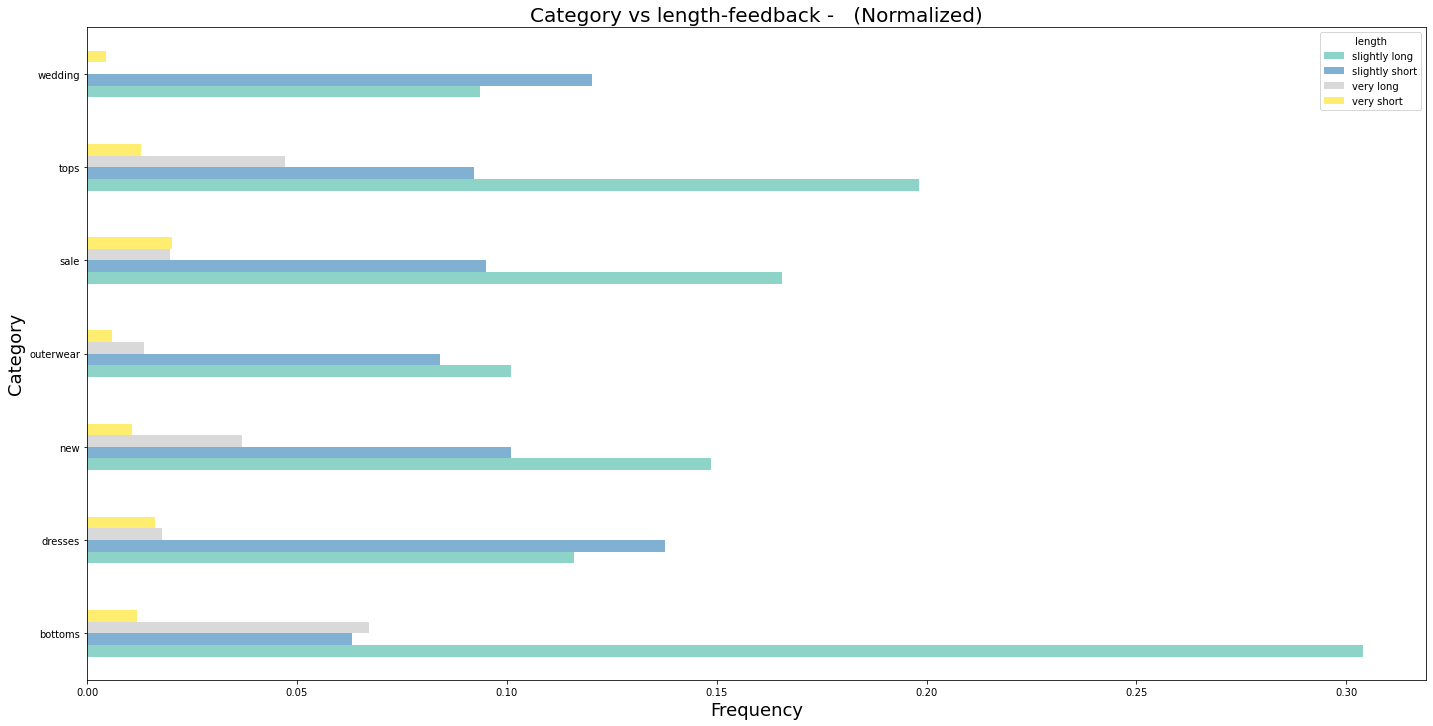

In [103]:
cat_len_norm = norm_counts(cat_len)
cat_len_norm.drop(['just right'], axis = 1, inplace=True)
plot_barh(cat_len_norm, 'length', cmap='Set3', norm=1)

we are able to conclude that: Customers tend to make 'slightly long' purchases in bottoms, new, sale, & tops categories.
'slightly short' returns take place mostly in dresses and wedding categories.

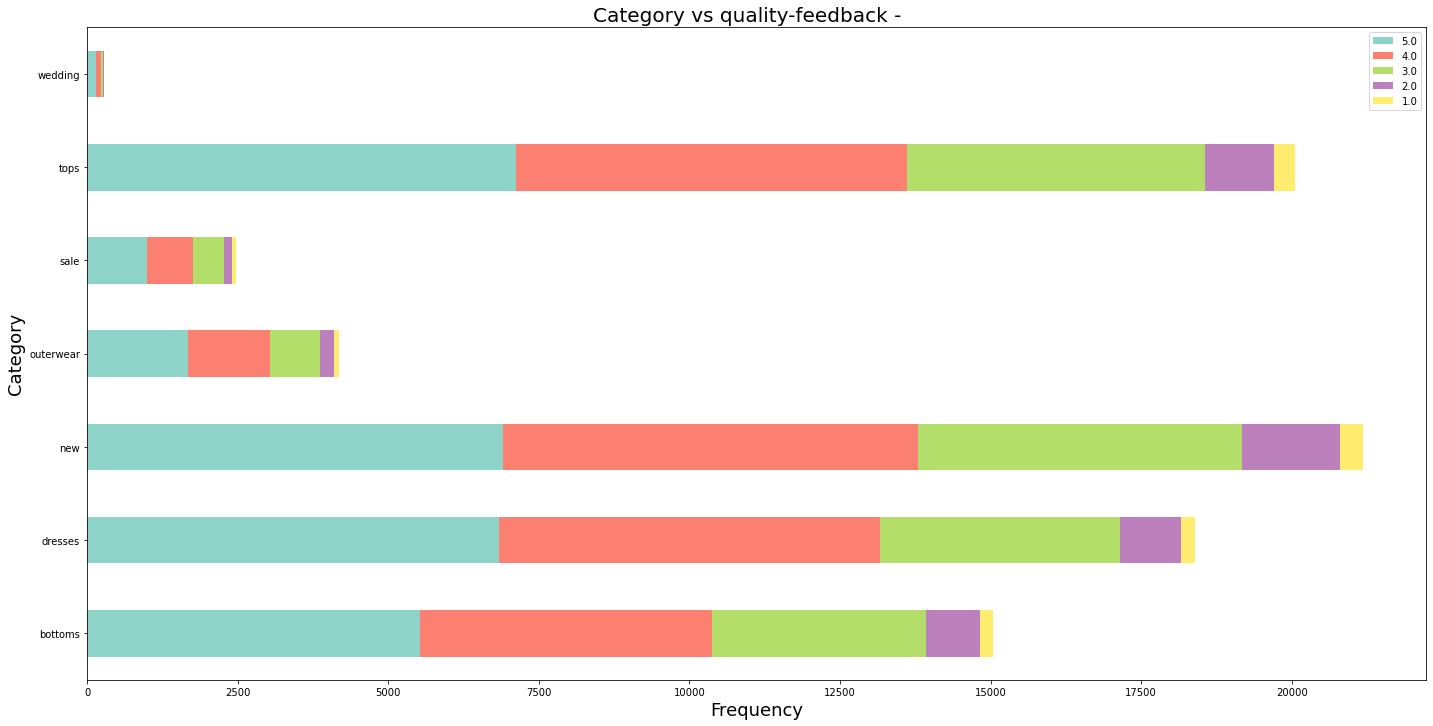

In [104]:
cat_quality = g_by_category['quality'].value_counts()
cat_quality = cat_quality.unstack()
plot_barh(cat_quality, 'quality', 'Set3', stacked=1)

All the trends in terms of share of ratings seems to be constant across categories

C:\Users\DVASWANI\AppData\Local\Temp\ipykernel_22564\491384212.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
C:\Users\DVASWANI\AppData\Local\Temp\ipykernel_22564\491384212.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
C:\Users\DVASWANI\AppData\Local\Temp\ipykernel_22564\491384212.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

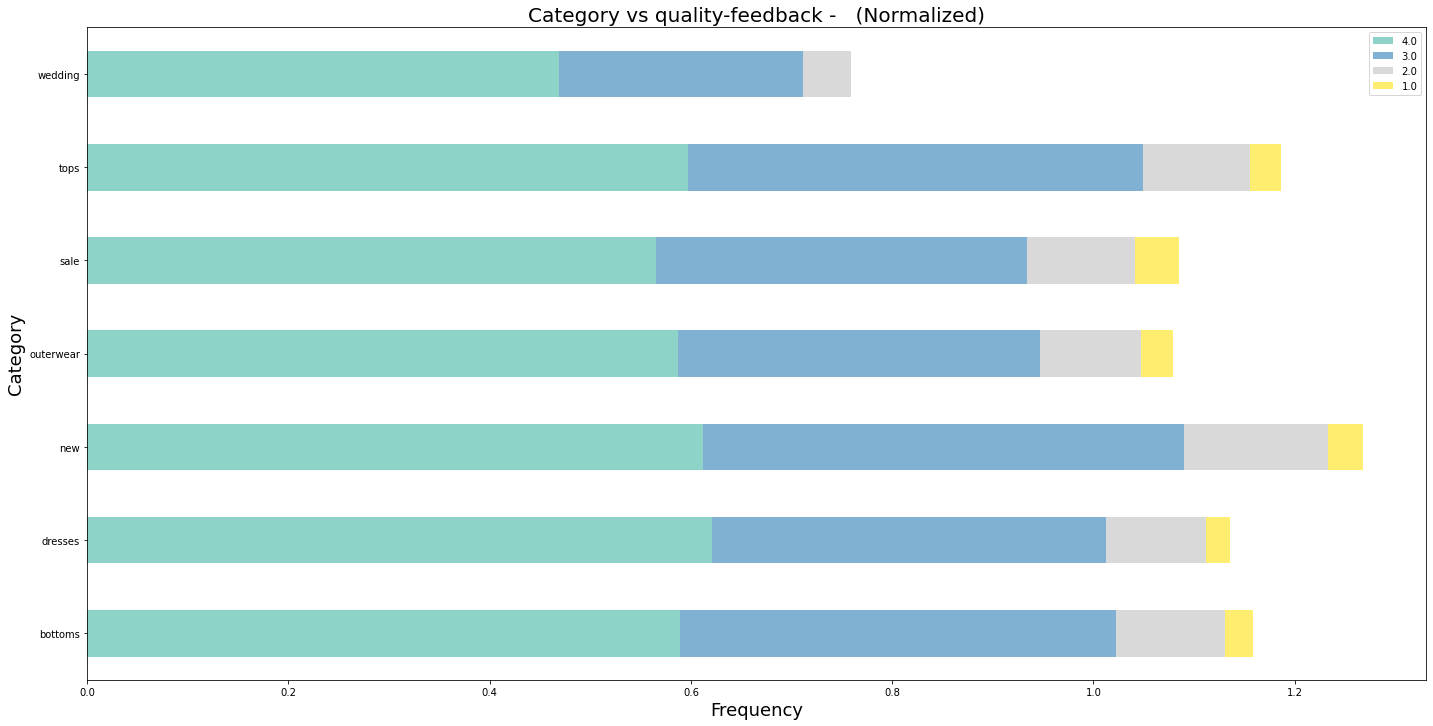

In [105]:
cat_quality_norm = norm_counts(cat_quality)
cat_quality_norm.drop([5.0], axis = 1, inplace=True)
plot_barh(cat_quality_norm, 'quality', 'Set3', stacked=1, norm=1)

# Total Number of Users vs Total Number of items bought

In [107]:
import seaborn as sns

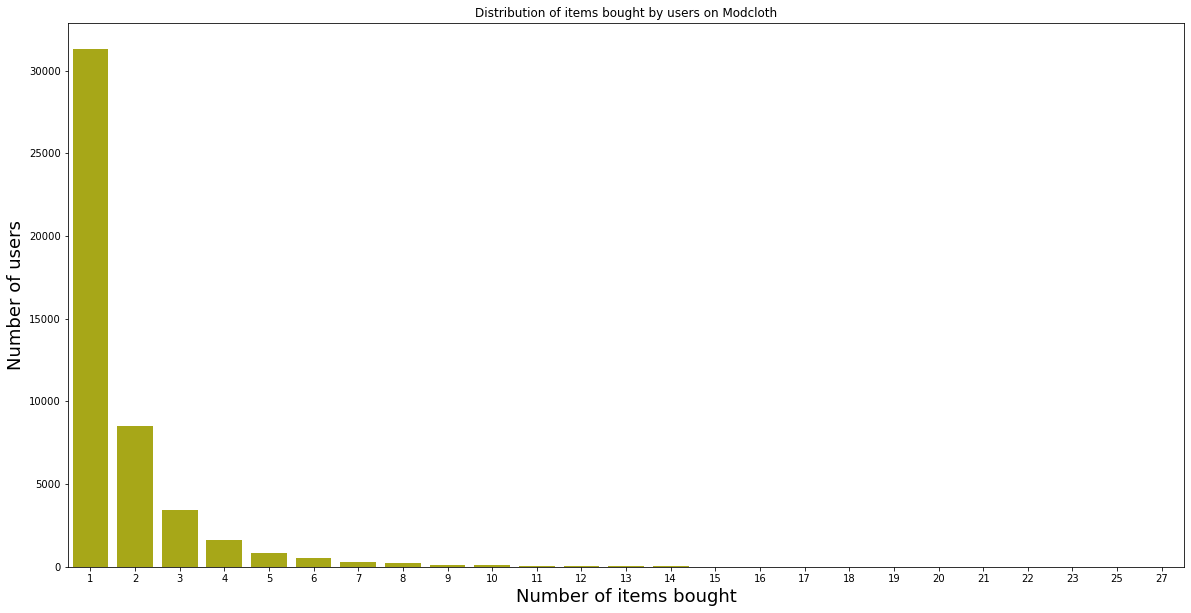

In [108]:
items_bought = []
total_users = []
for i in range(min(df.user_id.value_counts()), max(df.user_id.value_counts())+1):
    all_users = sum(df.user_id.value_counts() == i)
    if all_users != 0:
        total_users.append(all_users)
        items_bought.append(i)
plt.xlabel("Number of items bought", fontsize = 18)
plt.ylabel("Number of users", fontsize = 18)
plt.title("Distribution of items bought by users on Modcloth")
__ = sns.barplot(x=items_bought, y=total_users, color='y')
fig = plt.gcf()
fig.set_size_inches(20,10)

more than 30000 transactions are of the users who bought only 1 item wich is around 38%

Majority of people have bought either 1,2 or 3 items

# Height vs shoe_size

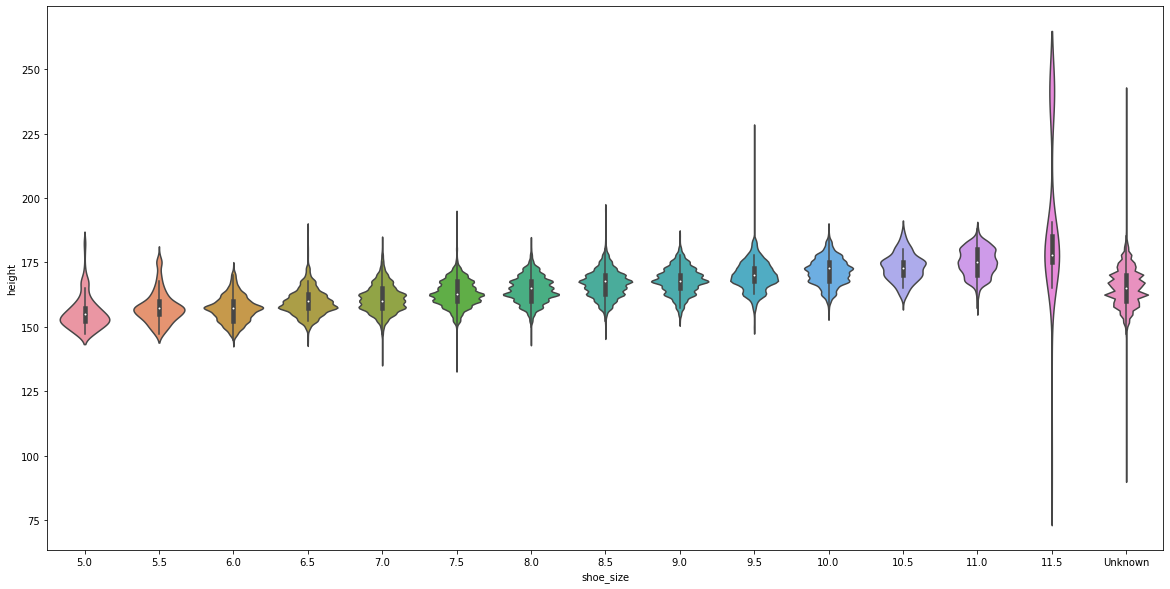

In [109]:
fig = plt.gcf()
fig.set_size_inches(20,10)
__ = sns.violinplot(x='shoe_size', y='height',data=df, size = 20)

expected linear relationship exists between Height and shoe_size

# FIRST EXPLORATORY DATA ANALYSIS